<a href="https://colab.research.google.com/github/mahluwal/Tensorflow/blob/master/DataScienceProject8TeslaStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data= pd.read_csv("https://raw.githubusercontent.com/mahluwal/Data1/main/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-26,166.899994,166.919998,163.141998,163.774002,163.774002,40448500
1,2020-05-27,164.171997,165.542007,157.000000,164.046005,164.046005,57747500
2,2020-05-28,162.701996,164.949997,160.337997,161.162003,161.162003,36278000
3,2020-05-29,161.750000,167.000000,160.841995,167.000000,167.000000,58822500
4,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500


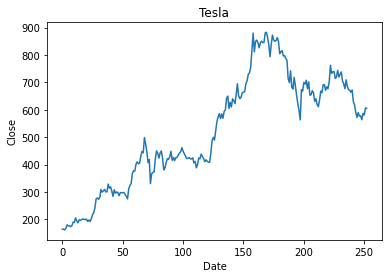

In [4]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [3]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [5]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [6]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
613,2022-05-21,25.820214,-546.847730,570.004192
614,2022-05-22,24.224822,-546.030955,550.593614
615,2022-05-23,29.176165,-539.882289,581.708692
616,2022-05-24,30.678112,-567.522319,547.810482
617,2022-05-25,27.920512,-540.001784,571.598333


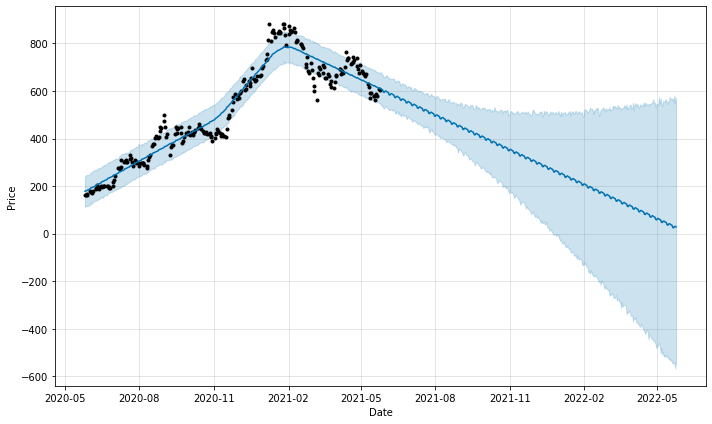

In [7]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")